In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Colonnes extraites de adult.names
columns = [
    'age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status',
    'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss',
    'hours-per-week', 'native-country', 'income'
]

# Charger le fichier d'entraînement
df_train = pd.read_csv("adult/adult.data", names=columns, sep=',', skipinitialspace=True)

# Charger le fichier de test
df_test = pd.read_csv("adult/adult.test", names=columns, sep=',', skipinitialspace=True, skiprows=1)

# Concaténer les deux fichiers pour une base unique
df = pd.concat([df_train, df_test], ignore_index=True)


# Nettoyage income (supprimer le point à la fin pour les données test)
#df['income'] = df['income'].apply(lambda x: x.replace('.', '') if isinstance(x, str) else x)


In [2]:
# Taille
print("Nombre de lignes :", df.shape[0])
print("Nombre de colonnes :", df.shape[1])
# Types
print("\nTypes des colonnes :\n", df.dtypes)

Nombre de lignes : 48842
Nombre de colonnes : 15

Types des colonnes :
 age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
income            object
dtype: object


In [3]:
# Aperçu
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
df.describe(include='all')

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
count,48842.000000,48842,4.884200e+04,48842,48842.000000,48842,48842,48842,48842,48842,48842.000000,48842.000000,48842.000000,48842,48842
unique,NaN,9,NaN,16,NaN,7,15,6,5,2,NaN,NaN,NaN,42,4
top,NaN,Private,NaN,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,<=50K
freq,NaN,33906,NaN,15784,NaN,22379,6172,19716,41762,32650,NaN,NaN,NaN,43832,24720
mean,38.643585,NaN,1.896641e+05,NaN,10.078089,NaN,NaN,NaN,NaN,NaN,1079.067626,87.502314,40.422382,NaN,NaN
std,13.710510,NaN,1.056040e+05,NaN,2.570973,NaN,NaN,NaN,NaN,NaN,7452.019058,403.004552,12.391444,NaN,NaN
min,17.000000,NaN,1.228500e+04,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,28.000000,NaN,1.175505e+05,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
50%,37.000000,NaN,1.781445e+05,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
75%,48.000000,NaN,2.376420e+05,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN


In [5]:
df.replace('?', np.nan, inplace=True)

print(df.isnull().sum())

age                  0
workclass         2799
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        2809
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     857
income               0
dtype: int64


Colonnes avec valeurs manquantes :
workclass         2799
occupation        2809
native-country     857
dtype: int64


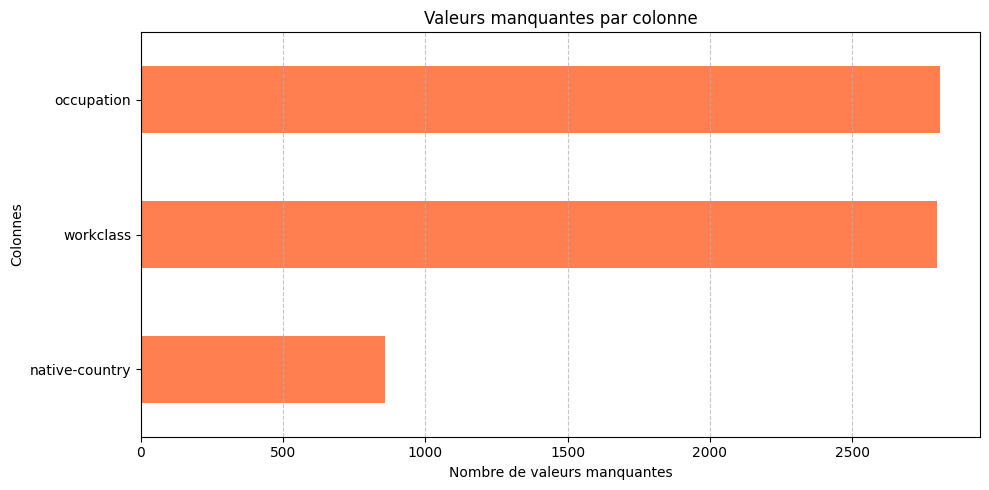

In [6]:
import matplotlib.pyplot as plt

# Calcul du nombre de valeurs manquantes par colonne
missing_counts = df.isnull().sum()
missing_counts = missing_counts[missing_counts > 0]

# Affichage graphique
plt.figure(figsize=(10, 5))
missing_counts.sort_values().plot(kind='barh', color='coral')
print("Colonnes avec valeurs manquantes :")
print(missing_counts)

plt.title("Valeurs manquantes par colonne")
plt.xlabel("Nombre de valeurs manquantes")
plt.ylabel("Colonnes")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [7]:
print(f"Nombre de doublons : {df.duplicated().sum()}")

Nombre de doublons : 29


In [8]:
# Nettoyage 
df['income'] = df['income'].apply(lambda x: x.replace('.', '') if isinstance(x, str) else x)

In [9]:
# Remplacer les valeurs manquantes 
df['workclass'] = df['workclass'].fillna(df['workclass'].mode()[0])
df['occupation'] = df['occupation'].fillna(df['occupation'].mode()[0])
df['native-country'] = df['native-country'].fillna(df['native-country'].mode()[0])

In [10]:
print(df.isnull().sum())


age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64


In [11]:
#Supprimer les doublons
print(f"Nombre de doublons avant suppression : {df.duplicated().sum()}")
df.drop_duplicates(inplace=True)
print(f"Nombre de doublons après suppression : {df.duplicated().sum()}")

Nombre de doublons avant suppression : 53
Nombre de doublons après suppression : 0


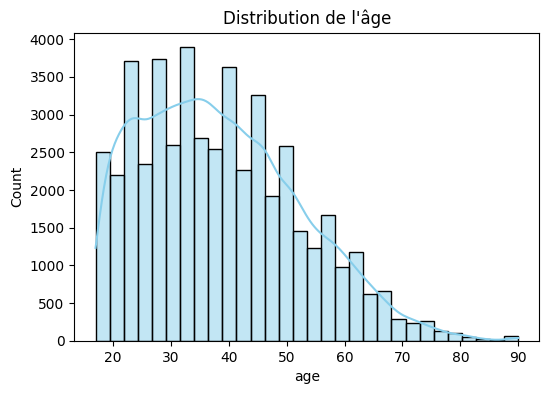

In [12]:
#  Distribution de l'âge
plt.figure(figsize=(6, 4))
sns.histplot(df['age'], bins=30, kde=True, color='skyblue')
plt.title("Distribution de l'âge")
plt.show()

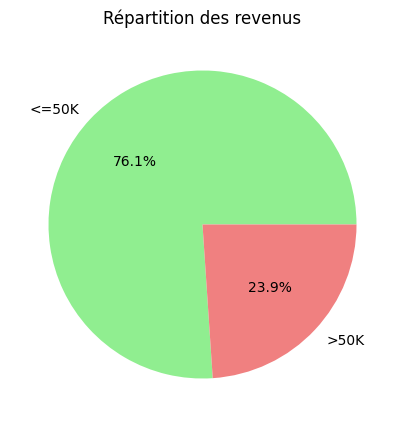

In [13]:
# Répartition des revenus
plt.figure(figsize=(5, 5))
df['income'].value_counts().plot.pie(autopct='%1.1f%%', colors=['lightgreen', 'lightcoral'])
plt.title("Répartition des revenus")
plt.ylabel('')
plt.show()

C:\Users\Rania\AppData\Local\Temp\ipykernel_10412\1592581217.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='income', y='hours-per-week', data=df, palette='Set2')


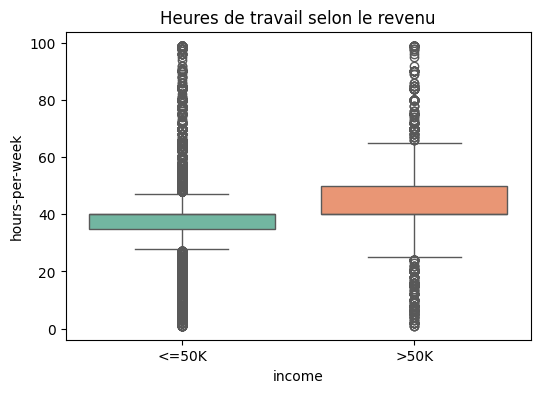

In [14]:
# Boîte à moustaches heures/revenu
plt.figure(figsize=(6, 4))
sns.boxplot(x='income', y='hours-per-week', data=df, palette='Set2')
plt.title("Heures de travail selon le revenu")
plt.show()

In [15]:
#Modeling
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, RocCurveDisplay
from sklearn.model_selection import train_test_split
# Définir les colonnes
numeric_features = ['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']
categorical_features = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']

# Créer le préprocesseur
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# Créer le pipeline complet avec RandomForest
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])

# Split des données
X = df.drop('income', axis=1)
y = df['income']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entraînement
pipeline.fit(X_train, y_train)



Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['age', 'education-num',
                                                   'capital-gain',
                                                   'capital-loss',
                                                   'hours-per-week']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['workclass', 'education',
                                                   'marital-status',
                                                   'occupation', 'relationship',
                                                   'race', 'sex',
                                                   'native-country'])])),
                ('classifier', RandomForestClassifier(random_state=42))])

In [16]:
#Build Model
from sklearn.linear_model import LogisticRegression
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)
model = LogisticRegression(max_iter=5000, random_state=42)
model.fit(X_train_processed, y_train)


LogisticRegression(max_iter=5000, random_state=42)

In [17]:
#Assess Model
y_pred = pipeline.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.840131174420988
              precision    recall  f1-score   support

       <=50K       0.88      0.92      0.90      7356
        >50K       0.71      0.60      0.65      2402

    accuracy                           0.84      9758
   macro avg       0.79      0.76      0.77      9758
weighted avg       0.83      0.84      0.84      9758



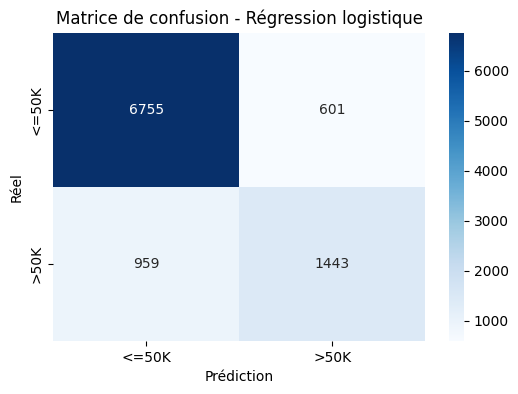

In [18]:
# Matrice de confusion
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['<=50K', '>50K'], yticklabels=['<=50K', '>50K'])
plt.xlabel('Prédiction')
plt.ylabel('Réel')
plt.title('Matrice de confusion - Régression logistique')
plt.show()

Accuracy: 0.8469973355195737
              precision    recall  f1-score   support

       <=50K       0.87      0.93      0.90      7356
        >50K       0.74      0.58      0.65      2402

    accuracy                           0.85      9758
   macro avg       0.81      0.76      0.78      9758
weighted avg       0.84      0.85      0.84      9758

Confusion Matrix:
 [[6863  493]
 [1000 1402]]
AUC-ROC: 0.9021231797047866


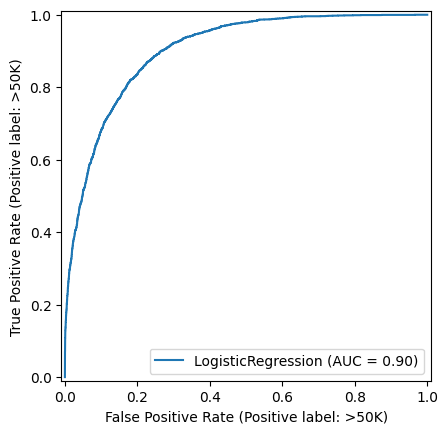

In [19]:
# Evaluation
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, RocCurveDisplay

# Prédictions
y_pred = model.predict(X_test_processed)

# Accuracy
acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)

# Rapport complet (precision, recall, f1-score)
print(classification_report(y_test, y_pred))

# Matrice de confusion
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Si modèle binaire, calculer AUC-ROC
if hasattr(model, "predict_proba"):
    y_proba = model.predict_proba(X_test_processed)[:,1]
    auc = roc_auc_score(y_test, y_proba)
    print("AUC-ROC:", auc)
    
    # Afficher la courbe ROC
    RocCurveDisplay.from_estimator(model, X_test_processed, y_test)

In [20]:
# Review Process
rf = pipeline.named_steps['classifier']
onehot_columns = pipeline.named_steps['preprocessor'].named_transformers_['cat'].get_feature_names_out(categorical_features)
all_features = numeric_features + list(onehot_columns)

feature_imp = pd.DataFrame({
    'Feature': all_features,
    'Importance': rf.feature_importances_
}).sort_values('Importance', ascending=False)

print("Top 10 des caractéristiques importantes :")
print(feature_imp.head(10))


Top 10 des caractéristiques importantes :
                              Feature  Importance
0                                 age    0.238397
4                      hours-per-week    0.116910
2                        capital-gain    0.105713
31  marital-status_Married-civ-spouse    0.072317
1                       education-num    0.069937
50               relationship_Husband    0.044762
3                        capital-loss    0.037024
33       marital-status_Never-married    0.017552
39         occupation_Exec-managerial    0.017218
51         relationship_Not-in-family    0.011478


In [ ]:
import pickle
import json


# Sauvegarder le pipeline
with open('model.pkl', 'wb') as f:
    pickle.dump(pipeline, f)
    
# Sauvegarder les noms de colonnes d'origine
with open('feature_names.json', 'w') as f:
    json.dump(list(X.columns), f)

In [ ]:
from flask import Flask, request, jsonify, render_template_string
import pandas as pd
import pickle
import json
import sys 

app = Flask(__name__)

# Configuration améliorée
class Config:
    DEFAULT_PORT = 8080
    MODEL_PATH = 'model.pkl'
    FEATURES_PATH = 'feature_names.json'

# Valeurs par défaut réalistes
DEFAULT_VALUES = {
    'age': 37,
    'workclass': 'Private',
    'education': 'HS-grad',
    'education-num': 9,
    'marital-status': 'Married-civ-spouse',
    'occupation': 'Craft-repair',
    'relationship': 'Husband',
    'race': 'White',
    'sex': 'Male',
    'capital-gain': 0,
    'capital-loss': 0,
    'hours-per-week': 40,
    'native-country': 'United-States'
}

def load_model():
    try:
        with open(Config.MODEL_PATH, 'rb') as f:
            pipeline = pickle.load(f)
        
        with open(Config.FEATURES_PATH, 'r') as f:
            features = json.load(f)
            
        return pipeline, features
        
    except Exception as e:
        print(f"\nERREUR CRITIQUE: Impossible de charger les fichiers du modèle\n{str(e)}", file=sys.stderr)
        return None, None

# Initialisation
pipeline, expected_features = load_model()
if pipeline is None:
    print("Le serveur ne peut pas démarrer sans modèle valide.")
    sys.exit(1)

@app.route('/')
def home():
    return render_template_string('''
        <!DOCTYPE html>
        <html>
        <head>
            <title>Prédiction de Revenu</title>
            <style>
                body { font-family: Arial, sans-serif; margin: 20px; }
                form { max-width: 500px; margin: 0 auto; }
                input, select, button { 
                    margin-bottom: 10px; 
                    width: 100%; 
                    padding: 8px;
                    box-sizing: border-box;
                }
                button { 
                    background-color: #4CAF50; 
                    color: white; 
                    border: none; 
                    cursor: pointer; 
                    padding: 10px;
                }
                button:hover { background-color: #45a049; }
                #result { 
                    margin-top: 20px; 
                    padding: 15px; 
                    border: 1px solid #ddd;
                    border-radius: 4px;
                    background-color: #f9f9f9;
                }
            </style>
        </head>
        <body>
            <h1>Prédicteur de Revenu</h1>
            <form id="predictionForm">
                <h3>Informations Personnelles</h3>
                Âge: <input type="number" name="age" min="17" max="90" value="35" required>
                
                <h3>Informations Professionnelles</h3>
                Classe travail: 
                <select name="workclass" required>
                    <option value="Private">Private</option>
                    <option value="State-gov">State-gov</option>
                    <option value="Self-emp">Self-emp</option>
                </select>
                
                Éducation: 
                <select name="education" required>
                    <option value="HS-grad">High School</option>
                    <option value="Bachelors">Bachelor's</option>
                    <option value="Masters">Master's</option>
                </select>
                
                Occupation: 
                <select name="occupation" required>
                    <option value="Adm-clerical">Admin</option>
                    <option value="Exec-managerial">Manager</option>
                    <option value="Prof-specialty">Professional</option>
                </select>
                
                Heures/semaine: <input type="number" name="hours-per-week" min="1" max="99" value="40" required>
                
                <button type="submit">Prédire le Revenu</button>
            </form>
            
            <div id="result"></div>
            
            <script>
                document.getElementById('predictionForm').addEventListener('submit', async (e) => {
                    e.preventDefault();
                    const resultDiv = document.getElementById('result');
                    resultDiv.innerHTML = '<p>En cours de traitement...</p>';
                    
                    try {
                        const formData = Object.fromEntries(new FormData(e.target));
                        const response = await fetch('/predict', {
                            method: 'POST',
                            headers: {
                                'Content-Type': 'application/json'
                            },
                            body: JSON.stringify(formData)
                        });
                        
                        if (!response.ok) throw new Error(await response.text());
                        
                        const result = await response.json();
                        const confidence = Math.round(result.probabilities[result.prediction] * 100);
                        
                        resultDiv.innerHTML = `
                            <h3>Résultat</h3>
                            <p>Prédiction: <strong>${result.prediction}</strong></p>
                            <p>Confiance: ${confidence}%</p>
                            <p>Détail des probabilités:</p>
                            <ul>
                                <li>&lt;=50K: ${(result.probabilities['<=50K'] * 100).toFixed(1)}%</li>
                                <li>&gt;50K: ${(result.probabilities['>50K'] * 100).toFixed(1)}%</li>
                            </ul>
                        `;
                    } catch (error) {
                        resultDiv.innerHTML = `<p style="color:red">Erreur: ${error.message}</p>`;
                    }
                });
            </script>
        </body>
        </html>
    ''')


@app.route('/predict', methods=['POST'])
def predict():
    try:
        data = request.get_json()
        
        # Validation améliorée
        required_fields = ['age', 'workclass', 'education', 'occupation', 'hours-per-week']
        if not all(field in data for field in required_fields):
            missing = [f for f in required_fields if f not in data]
            return jsonify({'error': f'Champs obligatoires manquants: {missing}'}), 400
        
        # Préparation des données
        input_data = DEFAULT_VALUES.copy()
        input_data.update(data)
        input_df = pd.DataFrame([input_data])
        
        # Prédiction
        prediction = pipeline.predict(input_df)[0]
        proba = pipeline.predict_proba(input_df)[0]
        
        return jsonify({
            'prediction': prediction,
            'confidence': float(max(proba)),
            'probabilities': {
                '<=50K': float(proba[0]),
                '>50K': float(proba[1])
            }
        })
        
    except Exception as e:
        app.logger.error(f"Erreur de prédiction: {str(e)}")
        return jsonify({'error': 'Erreur interne du serveur'}), 500

if __name__ == '__main__':
    # Configuration du serveur
    app.run(
        host='0.0.0.0',
        port=Config.DEFAULT_PORT,
        debug=True,
        use_reloader=False  
    )

 * Serving Flask app '__main__'
 * Debug mode: on


 * Running on all addresses (0.0.0.0)
 * Running on http://127.0.0.1:8080
 * Running on http://192.168.140.143:8080
Press CTRL+C to quit
127.0.0.1 - - [25/May/2025 10:35:16] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [25/May/2025 10:35:16] "GET /favicon.ico HTTP/1.1" 404 -
127.0.0.1 - - [25/May/2025 10:35:19] "POST /predict HTTP/1.1" 200 -


In [ ]:
from flask import Flask, request, jsonify
import pandas as pd
import pickle
import json

app = Flask(__name__)

@app.route('/predict', methods=['POST'])
def predict():
    try:
        data = request.get_json()
        input_df = pd.DataFrame([data])
        input_encoded = pd.get_dummies(input_df)
        for feature in expected_features:
            if feature not in input_encoded.columns:
                input_encoded[feature] = 0

        input_encoded = input_encoded[expected_features]
        
        
        prediction = pipeline.predict(input_encoded)[0]
        
        return jsonify({'prediction': prediction})
    
    except Exception as e:
        return jsonify({'error': str(e)}), 500

if __name__ == '__main__':
    app.run(port=8080)

In [ ]:
import requests
url = 'http://localhost:8080/predict'
data = {'sepal length (cm)': 5.1, 'sepal width (cm)': 3.5, 'petal length (cm)': 1.4, 'petal width (cm)': 0.2}
response = requests.post(url, json=data)
print(response.json())